In [71]:
import numpy as np
rng = np.random.default_rng()

## Generating 1000 random points(integers)  

In [72]:
x = (np.random.rand(1000)*100)
x= np.asarray(x,dtype='int')
y = x+np.random.normal(0,50,1000)
y= np.asarray(y,dtype='int')

## Linear regression from scratch

In [73]:
import pandas as pd
data = pd.DataFrame()

In [74]:
data['x'] = x
data['y'] = y

In [75]:
X = data['x'].values
Y = data['y'].values

# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)

## Finding slope and intercept 

In [76]:
m = len(X)

# using the formula to calculate m & c
numer = 0
denom = 0
for i in range(m):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = 0.8980208781975048 
c = 4.482811505535231


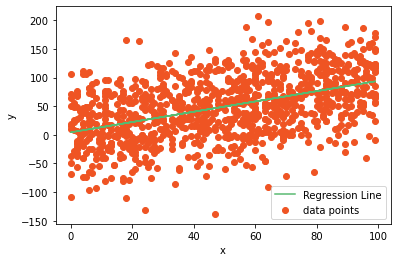

In [77]:
import matplotlib.pyplot as plt 
y = c + m * X
#plotting the graph

plt.plot(X, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='data points')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [78]:
import math  
import numpy as np  
actual = data['y']
predicted = y
   
MSE = np.square(np.subtract(actual,predicted)).mean()   
   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:\n")  
print(rsme)

print("Mean Square Error:\n")
print(MSE)

Root Mean Square Error:

49.51933098495301
Mean Square Error:

2452.164141197327


## Gradient Descent

In [79]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

0.962035446651249 0.22988997713877998


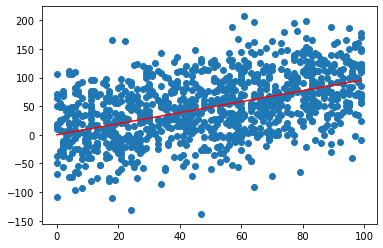

In [80]:
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

## Check

## Linear regression using sklearn

In [82]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=666)

In [84]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [85]:
print(reg.intercept_)
print(reg.coef_)

[4.48281151]
[[0.89802088]]


In [86]:
y_pred = reg.predict(x_test)

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

print('mae:', mean_absolute_error(y_test,y_pred))
print('mse:', math.sqrt(mean_squared_error(y_test,y_pred)))

mae: 5.925926416239235e-15
mse: 1.0139870558487707e-14


In [89]:
c_skl = reg.intercept_[0]
m_skl = reg.coef_[0,0]

In [90]:
y_pred_skl = reg.predict(x_test.reshape(-1,1))

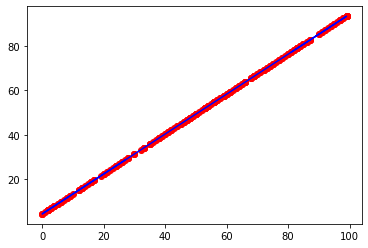

In [91]:
import matplotlib.pyplot as plt
plt.plot(x_test,y_pred_skl,c="b")
plt.scatter(x_test,y_test,c="r")